<a href="https://colab.research.google.com/github/Tien84/BitcoinPrediction/blob/master/demolstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/driver')

Mounted at /content/driver


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/driver/My Drive/DataSet/DataBitcoin.csv')
#data= data[::-1] 
data.index.freg='Date'
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-10-27,285.181000,296.212006,285.007996,293.787994,293.787994,46331800
1,2015-10-28,293.703003,306.330994,293.703003,304.618011,304.618011,50808100
2,2015-10-29,304.324005,318.170013,301.822998,313.855011,313.855011,64495900
3,2015-10-30,313.942993,334.169006,313.940002,328.015015,328.015015,78305000
4,2015-10-31,328.511993,332.777008,309.251007,314.165985,314.165985,48598100
...,...,...,...,...,...,...,...
2553,2022-10-23,19207.734375,19646.652344,19124.197266,19567.007813,19567.007813,22128794335
2554,2022-10-24,19567.769531,19589.125000,19206.324219,19345.572266,19345.572266,30202235805
2555,2022-10-25,19344.964844,20348.412109,19261.447266,20095.857422,20095.857422,47761524910
2556,2022-10-26,20092.236328,20938.134766,20076.117188,20770.441406,20770.441406,58895950537


In [7]:
data.head(), data.tail()

(         Date        Open        High         Low       Close   Adj Close  \
 0  2015-10-27  285.181000  296.212006  285.007996  293.787994  293.787994   
 1  2015-10-28  293.703003  306.330994  293.703003  304.618011  304.618011   
 2  2015-10-29  304.324005  318.170013  301.822998  313.855011  313.855011   
 3  2015-10-30  313.942993  334.169006  313.940002  328.015015  328.015015   
 4  2015-10-31  328.511993  332.777008  309.251007  314.165985  314.165985   
 
      Volume  
 0  46331800  
 1  50808100  
 2  64495900  
 3  78305000  
 4  48598100  ,
             Date          Open          High           Low         Close  \
 2553  2022-10-23  19207.734375  19646.652344  19124.197266  19567.007813   
 2554  2022-10-24  19567.769531  19589.125000  19206.324219  19345.572266   
 2555  2022-10-25  19344.964844  20348.412109  19261.447266  20095.857422   
 2556  2022-10-26  20092.236328  20938.134766  20076.117188  20770.441406   
 2557  2022-10-27  20775.890625  20849.746094  20684.7

In [8]:
open_price = data.iloc[:,1:2]
#open_price = data.iloc[:,2:2]
train_set = open_price[:1791].values
test_set = open_price[1791:].values
print("Train size: ",train_set.shape)
print("Test size:",test_set.shape)

Train size:  (1791, 1)
Test size: (767, 1)


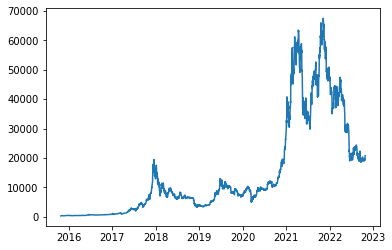

In [9]:
dates = pd.to_datetime(data['Date'])
plt.plot_date(dates,open_price, fmt='-')
plt.savefig("BTC_hinh.png")

In [10]:
len(data)

2558

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

In [12]:
def get_data(train,test,time_step,num_predict,date):
  x_train= list()
  y_train = list()
  x_test = list()
  y_test = list()
  date_test= list()

  for i in range(0,len(train) - time_step - num_predict):
    x_train.append(train[i:i+time_step])
    y_train.append(train[i+time_step:i+time_step+num_predict])

  for i in range(0, len(test) - time_step - num_predict):
    x_test.append(test[i:i+time_step])
    y_test.append(test[i+time_step:i+time_step+num_predict])
    date_test.append(date[i+time_step:i+time_step+num_predict])
  
  return np.asarray(x_train), np.asarray(y_train), np.asarray(x_test), np.asarray(y_test), np.asarray(date_test)

In [13]:
from sklearn.preprocessing import MinMaxScaler
x_train, y_train, x_test, y_test, date_test = get_data(train_set,test_set,2558,1, dates)

# dua ve 0->1 cho tap train
scaler = MinMaxScaler()
x_train = x_train.reshape(-1,1790)
y_train = x_train.reshape(-1,1)

#train_set_scaled = scaler.fit_transform(train_set)

x_train = scaler.fit_transform(train_set)
y_train = scaler.fit_transform(train_set)

#x_train = scaler.fit_transform(x_train)
#y_train = scaler.fit_transform(y_train)

# dua ve 0->1 cho tap test
x_test = x_test.reshape(-1,1790)
y_test = y_test.reshape(-1,1)

x_test = scaler.fit_transform(test_set)
y_test = scaler.fit_transform(test_set)

date_test = date_test.reshape(-1,1)


In [14]:
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dropout,Dense
#dau vao 12 doan 1
n_input = 12
n_features = 1

model = Sequential()
model.add(LSTM(units=50,activation='relu', input_shape=(n_input, n_features), return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(1))


In [15]:
model.compile(optimizer='adam', loss='mse')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 12, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 12, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 12, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [18]:
history=model.fit(x_train, y_train, epochs=20, validation_split=0.2, verbose=1, batch_size=30)
model.save('/content/driver/My Drive/DataSet/lstm_test')

Epoch 1/20
48/48 [==============================] - 0s 8ms/step - loss: 0.0021 - val_loss: 1.4017e-05
Epoch 2/20
48/48 [==============================] - 0s 8ms/step - loss: 0.0022 - val_loss: 7.6207e-05
Epoch 3/20
48/48 [==============================] - 0s 7ms/step - loss: 0.0019 - val_loss: 7.8981e-05
Epoch 4/20
48/48 [==============================] - 0s 8ms/step - loss: 0.0020 - val_loss: 1.4093e-05
Epoch 5/20
48/48 [==============================] - 0s 8ms/step - loss: 0.0020 - val_loss: 3.8864e-05
Epoch 6/20
48/48 [==============================] - 0s 7ms/step - loss: 0.0019 - val_loss: 1.9034e-05
Epoch 7/20
48/48 [==============================] - 0s 7ms/step - loss: 0.0018 - val_loss: 1.4355e-05
Epoch 8/20
48/48 [==============================] - 0s 7ms/step - loss: 0.0019 - val_loss: 2.3447e-05
Epoch 9/20
48/48 [==============================] - 0s 8ms/step - loss: 0.0019 - val_loss: 2.7540e-05
Epoch 10/20
48/48 [==============================] - 0s 7ms/step - loss: 0.0020 - 

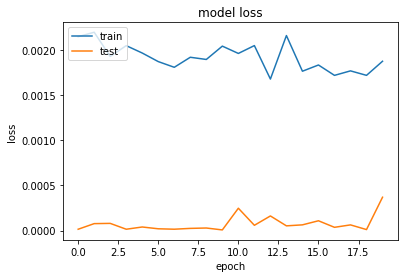

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper left')
plt.show()

24/24 [==============================] - 2s 6ms/step


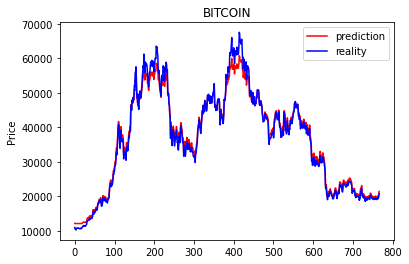

In [20]:
import matplotlib.pyplot as plt
import keras
model = keras.models.load_model('/content/driver/My Drive/DataSet/lstm_test')

test_output = model.predict(x_test)

# print(test_output)
test_1 = scaler.inverse_transform(test_output)
test_2 = scaler.inverse_transform(y_test)
plt.plot(test_1[:2558], color='r')
plt.plot(test_2[:2558] ,color='b')
plt.title("BITCOIN")
#plt.xlabel("STT")
plt.ylabel("Price")
plt.legend(('prediction', 'reality'),loc='upper right')
plt.show()

In [21]:
test_1 = scaler.inverse_transform(test_output)
test_2 = scaler.inverse_transform(y_test)
print(test_1)
print(test_2)

[[12173.367 ]
 [12087.506 ]
 [12090.552 ]
 [12079.052 ]
 [12117.451 ]
 [12102.379 ]
 [12113.49  ]
 [12121.773 ]
 [12104.6045]
 [12140.523 ]
 [12126.97  ]
 [12093.942 ]
 [12092.144 ]
 [12091.153 ]
 [12099.425 ]
 [12127.263 ]
 [12093.28  ]
 [12098.552 ]
 [12170.617 ]
 [12229.229 ]
 [12372.054 ]
 [12441.462 ]
 [12553.651 ]
 [12467.635 ]
 [12465.877 ]
 [12520.666 ]
 [12390.774 ]
 [12415.113 ]
 [12515.066 ]
 [12696.749 ]
 [12827.26  ]
 [13565.248 ]
 [13711.18  ]
 [13676.852 ]
 [13828.385 ]
 [13762.399 ]
 [13800.209 ]
 [14309.867 ]
 [13968.478 ]
 [14115.147 ]
 [14212.962 ]
 [14423.918 ]
 [14384.375 ]
 [14216.49  ]
 [14577.436 ]
 [14749.755 ]
 [16105.427 ]
 [16092.4795]
 [15406.976 ]
 [16011.79  ]
 [15874.031 ]
 [15835.245 ]
 [16219.059 ]
 [16755.9   ]
 [16794.465 ]
 [16561.615 ]
 [16456.557 ]
 [17137.258 ]
 [18074.254 ]
 [18234.652 ]
 [18248.012 ]
 [19082.92  ]
 [19105.762 ]
 [18818.475 ]
 [18813.215 ]
 [19609.686 ]
 [19201.396 ]
 [17594.078 ]
 [17554.137 ]
 [18149.525 ]
 [18616.742 ]
 [2018

In [22]:
# Đánh giá mô hình
score = model.evaluate(x_test, y_test,verbose=1, batch_size = 30)
print('Test Score', score)

26/26 [==============================] - 1s 3ms/step - loss: 7.4150e-04
Test Score 0.0007415046566165984


In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
predictions= model.predict(x_test) 
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

24/24 [==============================] - 0s 3ms/step
RMSE: 0.027231


In [24]:
mape = np.mean(np.abs(np.array(predictions) - np.array(test_set))/np.abs(test_set))
print('MAPE: ' + str(mape))

MAPE: 0.9999883175174543
